# OpenCV Experimentation Notebook
I am writing this notebook using the reference book Applied Deep Learning and Computer Vision for Self-Driving Cars which can be found [here](https://learning.oreilly.com/library/view/applied-deep-learning/9781838646301/).

Topics covered in this notebook:
* Converting images from different color spaces (e.g. BGR, HSV)
* Filtering images using blurring and sharpening kernels
* Edge detection and gradient calculation

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2

### Change an Image to Grayscale and Experiment with Filters

(354, 529, 3)


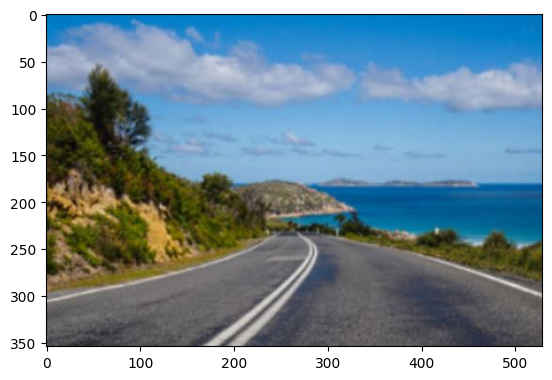

In [3]:
image_color = mpimg.imread('image.jpg')
plt.imshow(image_color)
print(image_color.shape)

(354, 529)


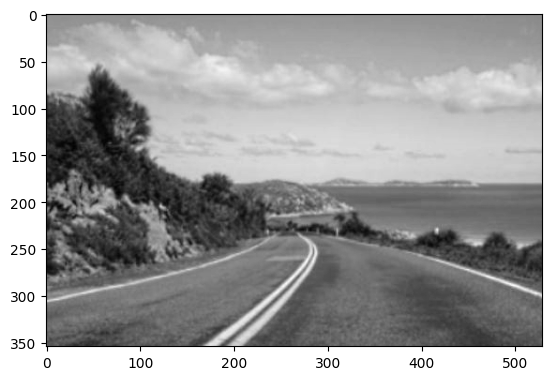

In [5]:
# Convert the image to grayscale
image_gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, cmap='gray')
print(image_gray.shape)

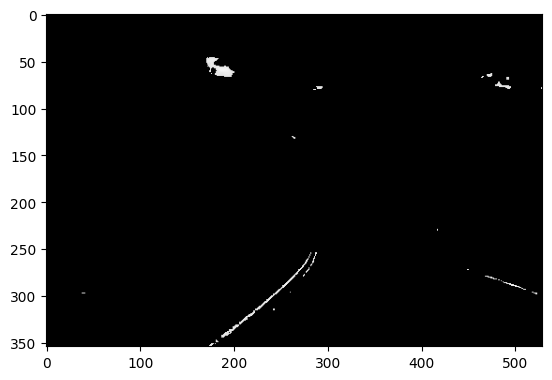

In [9]:
# Create a copy of the grayscale image and then filter on any value that is not white
image_gray_copy = np.copy(image_gray)
image_gray_copy[ (image_gray_copy[:,:] < 200) ] = 0
plt.imshow(image_gray_copy, cmap='gray')
plt.show()

### Experiment with Color Space Manipulation

(889, 1344, 3)


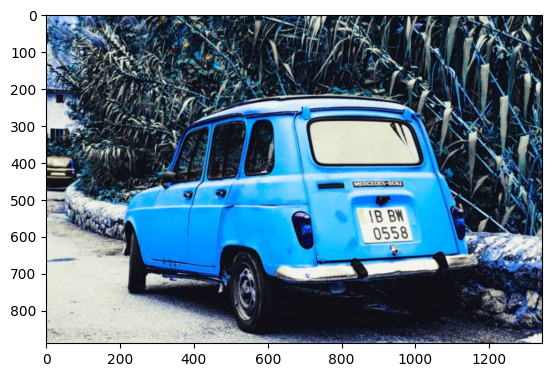

In [7]:
# Read in the image using OpenCV rather than matplotlib
test_image = cv2.imread('test_image.JPG')
plt.imshow(test_image)
print(test_image.shape)

In [8]:
# Opens a pop-up window with the image - notice the color differences. OpenCV uses a default color space of BGR while
# matplotlib uses a color space of RGB as the default.
cv2.imshow('Self Driving Car!', test_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
# Convert the test image from BGR to HSV and launch both in separate windows for comparison
test_image = cv2.imread('test_image.jpg')
cv2.imshow('Self Driving Car!', test_image)

hsv_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2HSV)
cv2.imshow('HSV Image', hsv_image)
cv2.waitKey()
cv2.destroyAllWindows()

Text(0.5, 1.0, 'Hue channel')

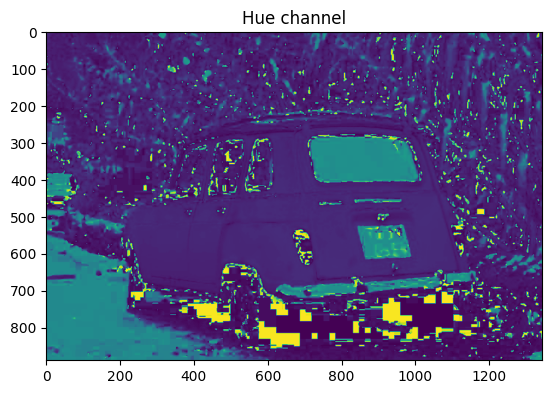

In [13]:
plt.imshow(hsv_image[:, :, 0])
plt.title('Hue channel')


Text(0.5, 1.0, 'Value channel')

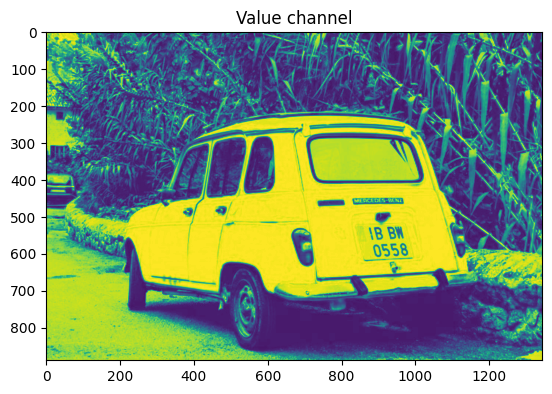

In [14]:
plt.imshow(hsv_image[:, :, 2])
plt.title('Value channel')

Text(0.5, 1.0, 'Saturation channel')

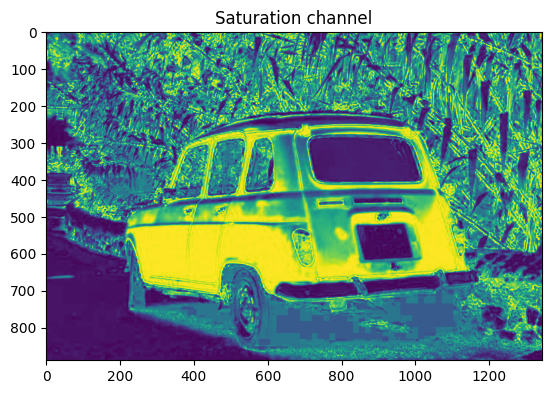

In [15]:
plt.imshow(hsv_image[:, :, 1])
plt.title('Saturation channel')

In [18]:
# Split the test image
B, G, R = cv2.split(test_image)
print(B.shape, G.shape, R.shape)

# Display the G channel to check
cv2.imshow("Green Channel", G)
cv2.waitKey(0)
cv2.destroyAllWindows()

(889, 1344) (889, 1344) (889, 1344)


In [20]:
# Create a channel with all zeros and merge it with the blue channel
zeros = np.zeros(test_image.shape[:2], dtype="uint8")

cv2.imshow("Blue Channel merged!", cv2.merge([B, zeros, zeros]))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [22]:
# Merge all the channels back together but add some extra blue
image_merged = cv2.merge([B+100, G, R])      
cv2.imshow("Merged Image!", image_merged) 

cv2.waitKey(0)
cv2.destroyAllWindows()

### Convolution
Applying a kernel matrix to an image results in a feature map. An image kernel is thus useful for applying certain effects to images (e.g. sharpening, blurring). Spatial relationships between pixels are preserved in this process.

**Sharpening** (the sharpen kernel) will emphasize details by highlighting differences between adjacent pixel values to increase the contrast.

**Blurring** (the blurring kernel) will average each pixel value and its neighbors and then normalize so it sums to 1. If it does not sum to one, the resulting image will be either brighter or darker.

In [23]:
# Apply a sharpening filter to the test image

test_image = cv2.imread('test_image.JPG')
gray_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

Sharp_Kernel_1 = np.array([[0,-1,0], 
                           [-1,5,-1], 
                           [0,-1,0]])

sharpened_gray_image = cv2.filter2D(gray_image, -1, Sharp_Kernel_1)
cv2.imshow('Sharpened Image Grayscale', sharpened_gray_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [24]:
# Make it even sharper with a different sharpening kernel

Sharp_Kernel_2 = np.array([[-1,-1,-1], 
                           [-1,9,-1], 
                           [-1,-1,-1]])

sharpened_gray_image = cv2.filter2D(gray_image, -1, Sharp_Kernel_2)
cv2.imshow('Even Sharper Image Grayscale', sharpened_gray_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [25]:
# Experiment with the blurring kernel now.
# This is the non-normalized blurring kernel and the image is much lighter.
Blurr_Kernel = np.ones((3,3))

blurred_gray_image = cv2.filter2D(gray_image, -1, Blurr_Kernel)
cv2.imshow('Blurred Image Grayscale', blurred_gray_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [26]:
# This is the normalized blurring kernel which keeps the image closer to the original "look".
Blurr_Kernel_Normalized = np.ones((3,3)) * 1/9

blurred_gray_image = cv2.filter2D(gray_image, -1, Blurr_Kernel_Normalized)
cv2.imshow('Blurred Image Grayscale', blurred_gray_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [28]:
# Create a stronger blurring kernel
Strong_Blurr_Kernel_Normalized = np.ones((8,8)) * (1/64)

blurred_gray_image = cv2.filter2D(gray_image, -1, Strong_Blurr_Kernel_Normalized)
cv2.imshow('Blurred Image Grayscale', blurred_gray_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Edge Detection
* Sobel method
  * Calculates the first order derivatives separately for the x-axis and y-axis using two 3x3 kernels that convolve over the original image
  * Computes the gradient using smoothing
* Laplacian method
  * Uses only one kernel to calculate 2nd order derivatives and zero-crossings in one pass
  * Can be sensitive to noise due to the 2nd derivative
* Canny method
  * Most accurate, most commonly used for edge detection

We'll try all three in the following cells to compare them.

In [31]:
# SOBEL METHOD
x_sobel = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize = 7)
cv2.imshow('Sobel - X direction', x_sobel)
cv2.waitKey()
cv2.destroyAllWindows()

In [34]:
# SOBEL METHOD
y_sobel = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize = 7)
cv2.imshow('Sobel - Y direction', y_sobel)
cv2.waitKey()
cv2.destroyAllWindows()

In [32]:
# LAPLACIAN METHOD
laplacian = cv2.Laplacian(gray_image, cv2.CV_64F)
cv2.imshow('Laplacian', laplacian)
cv2.waitKey()
cv2.destroyAllWindows()

In [33]:
# CANNY METHOD
threshold_1 = 120
threshold_2 = 200

canny = cv2.Canny(gray_image, threshold_1, threshold_2)

cv2.imshow('Canny', canny)
cv2.waitKey()
cv2.destroyAllWindows()